In [1]:
# importing libs
import pandas as pd
import numpy as np
import requests, json
import matplotlib.pyplot as plt
import time
import datetime

from pycoingecko import CoinGeckoAPI

In [1]:
# Starting The API
cg = CoinGeckoAPI(api_key='CG-T7MX4jd39kacSsJ6ftL6B2S9')

NameError: name 'CoinGeckoAPI' is not defined

In [3]:
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

### Retrieval and Undestanding of Trending coins between the 2019 and 2022
Task here is to scrape the trending list of coins (not fiat and stable coins)

##### Listing All Coins

In [4]:
all_coins_list = cg.get_coins_list()
df_coins = pd.DataFrame(all_coins_list)
df_coins

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract
...,...,...,...
9936,zynergy,zyn,Zynergy
9937,zyro,zyro,Zyro
9938,zyrri,zyr,Zyrri
9939,zyx,zyx,ZYX


##### Retrieve the information regarding the market cap for these coins

In [5]:
all_coins_market = cg.get_coins_markets(vs_currency='usd',per_page=250)
df_coins_markets = pd.DataFrame(all_coins_market)
df_coins_markets

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,3.059700e+04,593350483053,1,6.419020e+11,8.802162e+09,3.098400e+04,...,2.100000e+07,2.100000e+07,69045.000000,-55.72474,2021-11-10T14:24:11.849Z,6.781000e+01,44982.14731,2013-07-06T00:00:00.000Z,None,2023-06-25T13:48:15.925Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1.904850e+03,228646949722,2,2.286469e+11,7.266606e+09,1.925700e+03,...,1.201916e+08,NaN,4878.260000,-60.99892,2021-11-10T14:24:19.604Z,4.329790e-01,439314.99547,2015-10-20T00:00:00.000Z,"{'times': 82.22400840482533, 'currency': 'btc'...",2023-06-25T13:48:10.249Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.001000e+00,83242154543,3,8.324215e+10,1.945933e+10,1.003000e+00,...,8.321202e+10,NaN,1.320000,-24.39228,2018-07-24T00:00:00.000Z,5.725210e-01,74.72934,2015-03-02T00:00:00.000Z,None,2023-06-25T13:45:00.664Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,2.383400e+02,37105784754,4,4.761572e+10,7.270476e+08,2.421600e+02,...,1.579002e+08,2.000000e+08,686.310000,-65.30787,2021-05-10T07:24:17.097Z,3.981770e-02,597861.24066,2017-10-19T00:00:00.000Z,None,2023-06-25T13:48:13.837Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,9.995840e-01,28461755664,5,2.846176e+10,2.350902e+09,1.002000e+00,...,2.847203e+10,NaN,1.170000,-14.71256,2019-05-08T00:40:28.300Z,8.776470e-01,13.96056,2023-03-11T08:02:13.981Z,None,2023-06-25T13:48:16.284Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,metars-genesis,mrs,Metars Genesis,https://assets.coingecko.com/coins/images/2662...,1.620000e+00,101587828,246,1.616354e+09,1.168580e+05,1.650000e+00,...,1.000000e+09,NaN,4.300000,-62.41059,2022-08-06T23:23:06.656Z,5.849310e-01,176.30613,2022-09-16T23:23:54.565Z,None,2023-06-25T13:44:52.364Z
246,origintrail,trac,OriginTrail,https://assets.coingecko.com/coins/images/1877...,2.645650e-01,101268063,247,1.322733e+08,9.580720e+05,2.670920e-01,...,5.000000e+08,5.000000e+08,3.500000,-92.45223,2021-11-03T18:09:57.627Z,3.852620e-03,6766.62068,2020-03-13T02:24:12.031Z,"{'times': 1.645647716695923, 'currency': 'usd'...",2023-06-25T13:48:16.557Z
247,bitrise-token,brise,Bitgert,https://assets.coingecko.com/coins/images/1738...,2.542650e-07,101176170,248,2.556967e+08,1.775807e+06,2.803180e-07,...,4.270635e+14,1.000000e+15,0.000002,-86.16172,2022-03-07T08:25:04.177Z,6.165840e-10,41244.82730,2021-09-09T21:36:32.800Z,None,2023-06-25T13:48:06.642Z
248,iexec-rlc,rlc,iExec RLC,https://assets.coingecko.com/coins/images/646/...,1.400000e+00,100792752,249,1.211473e+08,5.621771e+06,1.430000e+00,...,8.699978e+07,8.699978e+07,15.510000,-91.02225,2021-05-10T17:59:51.557Z,1.538150e-01,805.31641,2018-12-15T00:00:00.000Z,None,2023-06-25T13:48:10.586Z


##### Get rid off the stablecoins

In [6]:
# List of known stablecoins
stablecoins = [
    "tether", "usd-coin", "binance-usd", "dai", "terrausd", 
    "paxos-standard", "true-usd", "gemini-dollar", "susd", 
    "neutrino", "husd", "stably-usd", "reserve-rights", 
    "mstable-usd", "fei-usd", "xsushi", "liquity-usd", 
    "frax-share", "empty-set-dollar", "softchain-usd", 
    "basis-cash", "mithril-share", "basis-share", "origin-dollar", 
    "elrond-standard-digital-token", "defidollar", "iron", 
    "digg", "metausd", "xsgd", "synthsusd", "defidollar-dao", 
    "seur", "seth", "sbtc", "slink", "sxrp", "sltc", "sada", 
    "sdot", "sxmr", "suni", "syfi", "saave", "sbnb", "seos", 
    "strx", "sxtz", "sdoge", "smatic"
]

In [7]:
df = df_coins_markets[~df_coins_markets['id'].isin(stablecoins)]

In [8]:
df_end = df.head(100)
df_end

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,30597.000000,593350483053,1,6.419020e+11,8.802162e+09,30984.000000,...,2.100000e+07,2.100000e+07,69045.000000,-55.72474,2021-11-10T14:24:11.849Z,67.810000,44982.14731,2013-07-06T00:00:00.000Z,None,2023-06-25T13:48:15.925Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1904.850000,228646949722,2,2.286469e+11,7.266606e+09,1925.700000,...,1.201916e+08,NaN,4878.260000,-60.99892,2021-11-10T14:24:19.604Z,0.432979,439314.99547,2015-10-20T00:00:00.000Z,"{'times': 82.22400840482533, 'currency': 'btc'...",2023-06-25T13:48:10.249Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,238.340000,37105784754,4,4.761572e+10,7.270476e+08,242.160000,...,1.579002e+08,2.000000e+08,686.310000,-65.30787,2021-05-10T07:24:17.097Z,0.039818,597861.24066,2017-10-19T00:00:00.000Z,None,2023-06-25T13:48:13.837Z
5,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.489930,25574416487,6,4.894223e+10,5.491731e+08,0.493504,...,9.998866e+10,1.000000e+11,3.400000,-85.59879,2018-01-07T00:00:00.000Z,0.002686,18119.66556,2014-05-22T00:00:00.000Z,None,2023-06-25T13:48:09.156Z
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1902.990000,14062462449,7,1.406246e+10,2.335762e+06,1924.800000,...,7.395618e+06,7.395618e+06,4829.570000,-60.60614,2021-11-10T14:40:47.256Z,482.900000,293.98819,2020-12-22T04:08:21.854Z,None,2023-06-25T13:47:58.217Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,nexo,nexo,NEXO,https://assets.coingecko.com/coins/images/3695...,0.639910,357947165,104,6.391914e+08,1.846465e+06,0.661682,...,1.000000e+09,1.000000e+09,4.070000,-84.28743,2021-05-12T14:37:47.535Z,0.045153,1315.60037,2018-09-13T00:00:00.000Z,"{'times': 5.39910481356302, 'currency': 'usd',...",2023-06-25T13:48:03.999Z
104,compound-usd-coin,cusdc,cUSDC,https://assets.coingecko.com/coins/images/9442...,0.022903,354083166,105,3.540832e+08,1.831000e+01,0.022960,...,1.545971e+10,NaN,0.058843,-61.07811,2020-10-21T11:24:27.820Z,0.006207,268.98288,2021-03-04T08:11:37.438Z,None,2023-06-25T13:46:07.809Z
105,zilliqa,zil,Zilliqa,https://assets.coingecko.com/coins/images/2687...,0.020778,342916902,106,4.327241e+08,5.500531e+07,0.022589,...,1.769068e+10,2.100000e+10,0.255376,-91.91453,2021-05-06T17:33:45.940Z,0.002396,761.72620,2020-03-13T02:22:55.161Z,"{'times': 0.28773511685745456, 'currency': 'et...",2023-06-25T13:48:09.193Z
106,dydx,dydx,dYdX,https://assets.coingecko.com/coins/images/1750...,1.990000,331386439,107,1.970924e+09,4.921930e+07,2.040000,...,1.000000e+09,1.000000e+09,27.860000,-92.89528,2021-09-30T01:23:43.570Z,1.011000,95.86410,2022-06-18T20:55:50.603Z,None,2023-06-25T13:48:14.720Z


##### Graph to show the difference in market cap

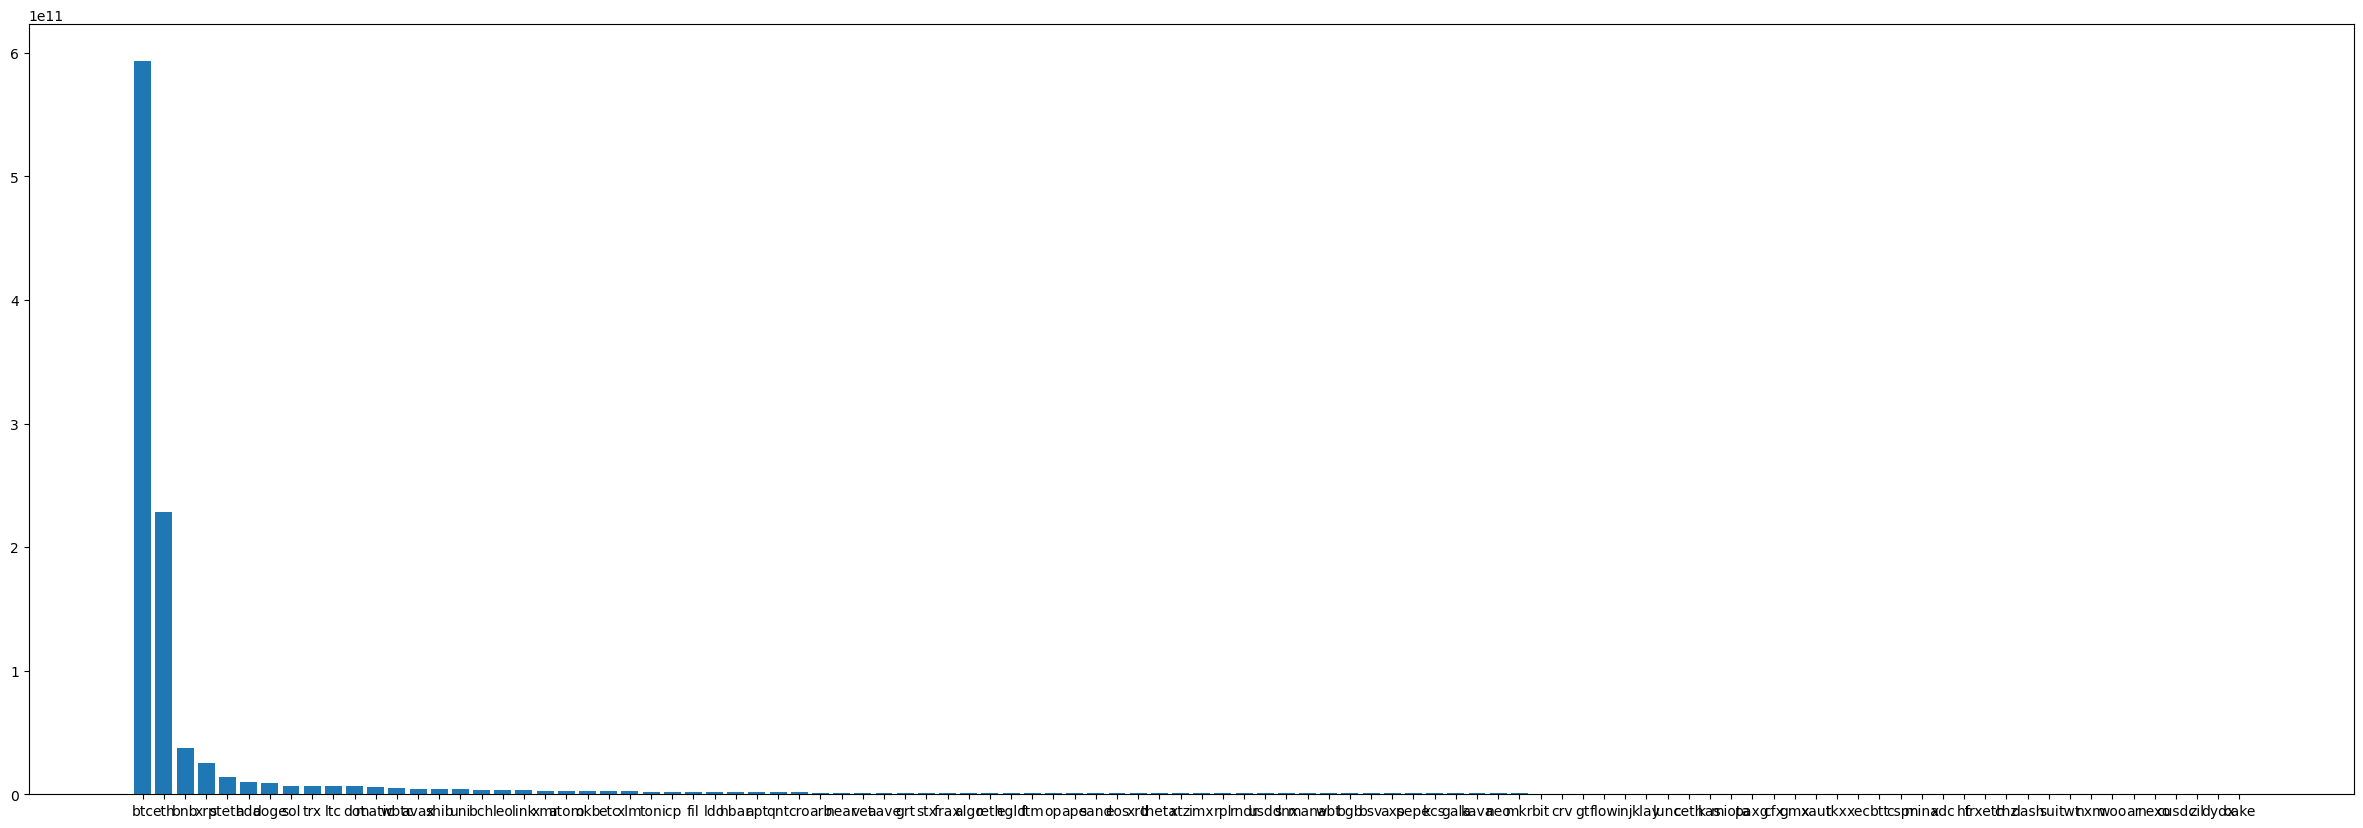

In [9]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.bar(df_end['symbol'],df_end['market_cap'])
plt.show()

### Getting the Historical Data

##### First add the timestamp criteria

In [10]:
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*2)
start_timestamp = int(time.mktime(start_date.timetuple()))
end_timestamp = int(time.mktime(end_date.timetuple()))

In [11]:
all_dfs = []
for index, row in df_end.iterrows():
    crypto_id = row['id']
    try:
        coin_hist = cg.get_coin_market_chart_by_id(
            id = crypto_id,
            vs_currency='usd',
            days= 365*2,
            localization = False
        )

        coin_hist_df = pd.DataFrame(coin_hist)
        coin_hist_df['id'] = crypto_id
        all_dfs.append(coin_hist_df)

        print(f"Data fetched successfully for {crypto_id}")
    except Exception as e:
        print(f"Error occurred while fetching data for {crypto_id}")

Data fetched successfully for bitcoin
Data fetched successfully for ethereum
Data fetched successfully for binancecoin
Data fetched successfully for ripple
Data fetched successfully for staked-ether
Data fetched successfully for cardano
Data fetched successfully for dogecoin
Data fetched successfully for solana
Data fetched successfully for tron
Data fetched successfully for litecoin
Data fetched successfully for polkadot
Data fetched successfully for matic-network
Data fetched successfully for wrapped-bitcoin
Data fetched successfully for avalanche-2
Data fetched successfully for shiba-inu
Data fetched successfully for uniswap
Data fetched successfully for bitcoin-cash
Data fetched successfully for leo-token
Data fetched successfully for chainlink
Data fetched successfully for monero
Data fetched successfully for cosmos
Data fetched successfully for okb
Data fetched successfully for ethereum-classic
Data fetched successfully for stellar
Data fetched successfully for the-open-network
D

In [12]:
df_hist = pd.concat(all_dfs,ignore_index=True)
df_hist

,prices,market_caps,total_volumes,id
0,"[1624665600000, 31943.136467863093]","[1624665600000, 598703019611.4526]","[1624665600000, 38635245431.3565]",bitcoin
1,"[1624752000000, 32023.973901774916]","[1624752000000, 600235334320.8247]","[1624752000000, 36873109419.90242]",bitcoin
2,"[1624838400000, 34607.293274083386]","[1624838400000, 649262127990.3759]","[1624838400000, 34335452117.32629]",bitcoin
3,"[1624924800000, 34556.8421269449]","[1624924800000, 647741224116.9337]","[1624924800000, 32453802891.01519]",bitcoin
4,"[1625011200000, 35968.993667970346]","[1625011200000, 674231340724.4149]","[1625011200000, 35121257875.54662]",bitcoin
...,...,...,...,...
67444,"[1687392000000, 1.4342453903523373]","[1687392000000, 296087304.4671464]","[1687392000000, 36634286.34916529]",pancakeswap-token
67445,"[1687478400000, 1.4070470877590087]","[1687478400000, 290578255.7781004]","[1687478400000, 34889830.167347714]",pancakeswap-token
67446,"[1687564800000, 1.4350517164902867]","[1687564800000, 295787686.2663474]","[1687564800000, 31518286.296966195]",pancakeswap-token
67447,"[1687651200000, 1.4225565453813787]","[1687651200000, 303003415.2427801]","[1687651200000, 31108042.801170077]",pancakeswap-token


### Restructuring the data

In [13]:
df_hist_price = pd.DataFrame(df_hist['prices'].to_list(),columns=['timestamp','price'])
df_hist_price

,timestamp,price
0,1624665600000,31943.136468
1,1624752000000,32023.973902
2,1624838400000,34607.293274
3,1624924800000,34556.842127
4,1625011200000,35968.993668
...,...,...
67444,1687392000000,1.434245
67445,1687478400000,1.407047
67446,1687564800000,1.435052
67447,1687651200000,1.422557


In [14]:
df_hist_cap = pd.DataFrame(df_hist['market_caps'].to_list(),columns=['timestamp','market_cap'])
df_hist_cap.drop('timestamp',axis=1,inplace=True)

In [15]:
df_hist_v = pd.DataFrame(df_hist['total_volumes'].to_list(),columns=['timestamp','total_volume'])
df_hist_v.drop('timestamp',inplace=True, axis=1)
df_hist_v

,total_volume
0,3.863525e+10
1,3.687311e+10
2,3.433545e+10
3,3.245380e+10
4,3.512126e+10
...,...
67444,3.663429e+07
67445,3.488983e+07
67446,3.151829e+07
67447,3.110804e+07


In [16]:
df_hist = pd.concat([df_hist,df_hist_price,df_hist_cap,df_hist_v], axis=1,join='inner')
df_hist.drop(df_hist[['prices','market_caps','total_volumes']],axis=1,inplace=True)
df_hist

,id,timestamp,price,market_cap,total_volume
0,bitcoin,1624665600000,31943.136468,5.987030e+11,3.863525e+10
1,bitcoin,1624752000000,32023.973902,6.002353e+11,3.687311e+10
2,bitcoin,1624838400000,34607.293274,6.492621e+11,3.433545e+10
3,bitcoin,1624924800000,34556.842127,6.477412e+11,3.245380e+10
4,bitcoin,1625011200000,35968.993668,6.742313e+11,3.512126e+10
...,...,...,...,...,...
67444,pancakeswap-token,1687392000000,1.434245,2.960873e+08,3.663429e+07
67445,pancakeswap-token,1687478400000,1.407047,2.905783e+08,3.488983e+07
67446,pancakeswap-token,1687564800000,1.435052,2.957877e+08,3.151829e+07
67447,pancakeswap-token,1687651200000,1.422557,3.030034e+08,3.110804e+07


In [17]:
df_hist.drop_duplicates(inplace=True)
df_hist

,id,timestamp,price,market_cap,total_volume
0,bitcoin,1624665600000,31943.136468,5.987030e+11,3.863525e+10
1,bitcoin,1624752000000,32023.973902,6.002353e+11,3.687311e+10
2,bitcoin,1624838400000,34607.293274,6.492621e+11,3.433545e+10
3,bitcoin,1624924800000,34556.842127,6.477412e+11,3.245380e+10
4,bitcoin,1625011200000,35968.993668,6.742313e+11,3.512126e+10
...,...,...,...,...,...
67444,pancakeswap-token,1687392000000,1.434245,2.960873e+08,3.663429e+07
67445,pancakeswap-token,1687478400000,1.407047,2.905783e+08,3.488983e+07
67446,pancakeswap-token,1687564800000,1.435052,2.957877e+08,3.151829e+07
67447,pancakeswap-token,1687651200000,1.422557,3.030034e+08,3.110804e+07


In [18]:
df_hist['timestamp'] = pd.to_datetime(df_hist['timestamp'],unit='ms')
df_hist

,id,timestamp,price,market_cap,total_volume
0,bitcoin,2021-06-26 00:00:00,31943.136468,5.987030e+11,3.863525e+10
1,bitcoin,2021-06-27 00:00:00,32023.973902,6.002353e+11,3.687311e+10
2,bitcoin,2021-06-28 00:00:00,34607.293274,6.492621e+11,3.433545e+10
3,bitcoin,2021-06-29 00:00:00,34556.842127,6.477412e+11,3.245380e+10
4,bitcoin,2021-06-30 00:00:00,35968.993668,6.742313e+11,3.512126e+10
...,...,...,...,...,...
67444,pancakeswap-token,2023-06-22 00:00:00,1.434245,2.960873e+08,3.663429e+07
67445,pancakeswap-token,2023-06-23 00:00:00,1.407047,2.905783e+08,3.488983e+07
67446,pancakeswap-token,2023-06-24 00:00:00,1.435052,2.957877e+08,3.151829e+07
67447,pancakeswap-token,2023-06-25 00:00:00,1.422557,3.030034e+08,3.110804e+07


##### Retrieving the OHLC Data

In [24]:
all_dfs2 = []
for index, row in df_end.iterrows():
    crypto_id = row['id']
    try:
        coin_ohlc = cg.get_coin_ohlc_by_id(
            id=crypto_id,
            vs_currency='usd',
            days = 180,
            interval='daily'
        )

        coin_ohlc_df = pd.DataFrame(coin_ohlc,columns=['timestamp','open','high','low','close'])
        coin_ohlc_df['timestamp'] = pd.to_datetime(coin_ohlc_df['timestamp'],unit='ms')
        coin_ohlc_df['id'] = crypto_id
        all_dfs2.append(coin_ohlc_df)
        print(f"Data fetched successfully for {crypto_id}")
    except Exception as e:
        print(f"Error for {crypto_id}")

Data fetched successfully for bitcoin
Data fetched successfully for ethereum
Data fetched successfully for binancecoin
Data fetched successfully for ripple
Data fetched successfully for staked-ether
Data fetched successfully for cardano
Data fetched successfully for dogecoin
Data fetched successfully for solana
Data fetched successfully for tron
Data fetched successfully for litecoin
Data fetched successfully for polkadot
Data fetched successfully for matic-network
Data fetched successfully for wrapped-bitcoin
Data fetched successfully for avalanche-2
Data fetched successfully for shiba-inu
Data fetched successfully for uniswap
Data fetched successfully for bitcoin-cash
Data fetched successfully for leo-token
Data fetched successfully for chainlink
Data fetched successfully for monero
Data fetched successfully for cosmos
Data fetched successfully for okb
Data fetched successfully for ethereum-classic
Data fetched successfully for stellar
Data fetched successfully for the-open-network
D

In [25]:
df_ohlc = pd.concat(all_dfs2,ignore_index=True)
df_ohlc

,timestamp,open,high,low,close,id
0,2022-12-28,16777.90,16795.72,16647.60,16701.28,bitcoin
1,2022-12-29,16699.69,16717.05,16514.47,16515.82,bitcoin
2,2022-12-30,16541.38,16659.64,16527.81,16624.52,bitcoin
3,2022-12-31,16646.17,16646.17,16464.04,16589.02,bitcoin
4,2023-01-01,16609.13,16611.61,16521.82,16521.82,bitcoin
...,...,...,...,...,...,...
17770,2023-06-22,1.41,1.44,1.40,1.43,pancakeswap-token
17771,2023-06-23,1.43,1.47,1.41,1.41,pancakeswap-token
17772,2023-06-24,1.41,1.45,1.41,1.44,pancakeswap-token
17773,2023-06-25,1.44,1.45,1.40,1.42,pancakeswap-token


### Save Dataframes

In [27]:
df_hist.to_csv('hist.csv', index=False)
df_ohlc.to_csv('ohlc.csv',index=False)